<hr style="height:10px"> 
 
<div class='container2'>
	<h1>Inteligência Artificial - CSI457 - Turma 11</h1>
    <h2>UFOP - DECSI</h2>
</div>
<p><b>Doscente</b>:Talles Henrique de Medeiros</p>
<p><b>Discentes</b>: Kevin Lucas de Oliveira Brito - 19.1.8022, Lucas Brazzarola Lima - 19.1.8065</p>


<hr style="height:5px"> 
    
<h2>Análise e Preparação dos Dados: Abandono e Sucesso Acadêmico dos Alunos</h2>

<hr style="height:2px"> 

# Tratamento e Análise de Dados para Modelagem de Machine Learning

Este trabalho tem como objetivo explorar e preparar uma base de dados escolhida para a construção de modelos de Machine Learning. Para atingir esse propósito, seguir-se-á um conjunto de etapas fundamentais visando a qualidade e eficácia dos modelos a serem desenvolvidos.

📊 Tratamento da Base de Dados:

- A primeira etapa consiste no tratamento da base de dados. Isso inclui a normalização dos dados, remoção de atributos irrelevantes e a verificação de valores ausentes. A normalização é crucial para garantir que todas as variáveis tenham a mesma escala, evitando assim o viés do modelo em direção a características específicas. A remoção de atributos irrelevantes contribui para a simplificação do modelo, focando apenas nas variáveis mais significativas. A detecção e tratamento de valores ausentes são essenciais para evitar distorções nos resultados.

📈 Análise Estatística:

- A segunda etapa compreende a apresentação de estatísticas básicas. Serão calculadas a média e a variância de cada atributo, proporcionando uma compreensão mais profunda da distribuição dos dados. Além disso, será gerado um histograma para cada atributo, proporcionando uma representação visual das distribuições. A identificação de outliers, ou exceções, será realizada para garantir a qualidade dos dados utilizados na construção dos modelos.

🔀 Divisão do Conjunto de Dados:

- A terceira etapa envolve a separação do conjunto de dados em três subconjuntos distintos: treinamento (60%), validação (20%) e teste (20%). Essa divisão estratégica permite avaliar a performance dos modelos em diferentes fases, garantindo sua generalização e eficiência.

🏋️‍♂️🧾 Treinamento e Validação dos Modelos:

- A quarta etapa compreende o treinamento dos modelos. Cada modelo será treinado com o subconjunto de treinamento, e o subconjunto de validação será utilizado para interromper o treinamento quando o erro não apresentar mais redução significativa. Essa abordagem visa evitar o overfitting, garantindo que os modelos sejam capazes de generalizar bem para novos dados.

📊🤖 Avaliação dos Modelos:

- Por fim, a quinta etapa consiste na avaliação dos modelos. Utilizando o conjunto de teste, serão calculadas métricas como acurácia e matriz de confusão. Além disso, será identificada a quantidade ideal de camadas e neurônios por camada na rede MLP, otimizando assim a arquitetura do modelo para o conjunto de dados em questão.

---
## 🛠️ Recursos Necesários

Para a execução deste trabalho, é necessário a instalação de algumas bibliotecas do Python. São elas:

* [ucimlrepo](https://pypi.org/project/ucimlrepo/): para carregar a base de dados.
* [pandas](https://pandas.pydata.org/): para manipulação e análise dos dados.
* [scikit-learn](https://scikit-learn.org/stable/): para construção e avaliação dos modelos de Machine Learning.
* [matplotlib](https://matplotlib.org/): para visualização dos dados.
* [seaborn](https://seaborn.pydata.org/): para visualização dos dados.
* [numpy](https://numpy.org/): para manipulação e cálculos matemáticos.

---
## 📖 Importando Bibliotecas e Conjunto de Dados

- O conjunto de dados escolhido para este trabalho é o "Predict students' dropout and academic success", disponível no repositório UCI Machine Learning. Este conjunto de dados contém informações sobre o desempenho acadêmico de alunos do ensino médio, incluindo atributos como gênero, idade, escolaridade dos pais, tempo de estudo, entre outros. O objetivo é prever o abandono e o sucesso acadêmico dos alunos com base nesses atributos.

- Abaixo vamos importar todas as bibliotecas necessárias para a execução do trabalho.
---

In [2]:
# %pip install ucimlrepo
# %pip install pandas
# %pip install -U scikit-learn
# %pip install seaborn

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


In [3]:
dataset = fetch_ucirepo(id=697) 
  
print("Dataset imported successfully:\n")

for key, value in dataset.metadata.items():
    if isinstance(value, list):
        value_str = ', '.join(map(str, value))
    elif isinstance(value, dict):
        print(f"\n{key.capitalize()}:")
        for sub_key, sub_value in value.items():
            print(f"{sub_key.capitalize()}: {sub_value}")
        continue
    else:
        value_str = value
    print(f"{key.capitalize()}: {value_str}")

Dataset imported successfully:

Uci_id: 697
Name: Predict students' dropout and academic success
Repository_url: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
Data_url: https://archive.ics.uci.edu/static/public/697/data.csv
Abstract: A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.
The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. 
The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.
Area: Other


---
## 📊 Tratamento da Base de Dados

In [4]:
# Obtendo parâmetros e alvos do dataset
X = dataset.data.features
y = dataset.data.targets

# Normalizando os dados uasndo Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print("\n\nPrimeiras Linhas dos dados normalizados:\n")
print(X_normalized[:5])



Primeiras Linhas dos dados normalizados:

[[0.         0.28571429 0.55555556 0.0138582  1.         0.
  0.28421053 0.         0.41860465 0.25581395 0.0257732  0.04615385
  0.34       1.         0.         0.         1.         1.
  0.         0.05660377 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.37209302 0.48888889 0.7661823 ]
 [0.         0.25       0.11111111 0.92598915 1.         0.
  0.68421053 0.         0.         0.04651163 0.01546392 0.01538462
  0.5        1.         0.         0.         0.         1.
  0.         0.03773585 0.         0.         0.23076923 0.13333333
  0.23076923 0.74172185 0.         0.         0.26086957 0.18181818
  0.3        0.73589744 0.         0.73255814 0.11111111 0.64068692]
 [0.         0.         0.55555556 0.90751155 1.         0.
  0.28421053 0.         0.8372093  0.8372093  0.04639175 0.04615385
  0.31368421 1.         0.         0.         0.         1

--- 
# 📈 Análise Estatística



Média dos atributos:

0     0.035714
1     0.315519
2     0.191983
3     0.886086
4     0.890823
5     0.085185
6     0.395930
7     0.008085
8     0.431673
9     0.494775
10    0.056499
11    0.056576
12    0.336612
13    0.548373
14    0.011528
15    0.113698
16    0.880651
17    0.351718
18    0.248418
19    0.118210
20    0.024864
21    0.035500
22    0.241176
23    0.184423
24    0.181023
25    0.563752
26    0.011472
27    0.028517
28    0.270963
29    0.244342
30    0.221790
31    0.550857
32    0.012526
33    0.461179
34    0.450673
35    0.536588
dtype: float64


Variância dos atributos:

0     0.014677
1     0.097485
2     0.021309
3     0.042943
4     0.097280
5     0.059172
6     0.019272
7     0.004099
8     0.131671
9     0.127318
10    0.018544
11    0.016784
12    0.023239
13    0.247716
14    0.011398
15    0.100794
16    0.105129
17    0.228064
18    0.186749
19    0.020497
20    0.024252
21    0.013930
22    0.009100
23    0.008625
24    0.014163
25    0.065853
26 

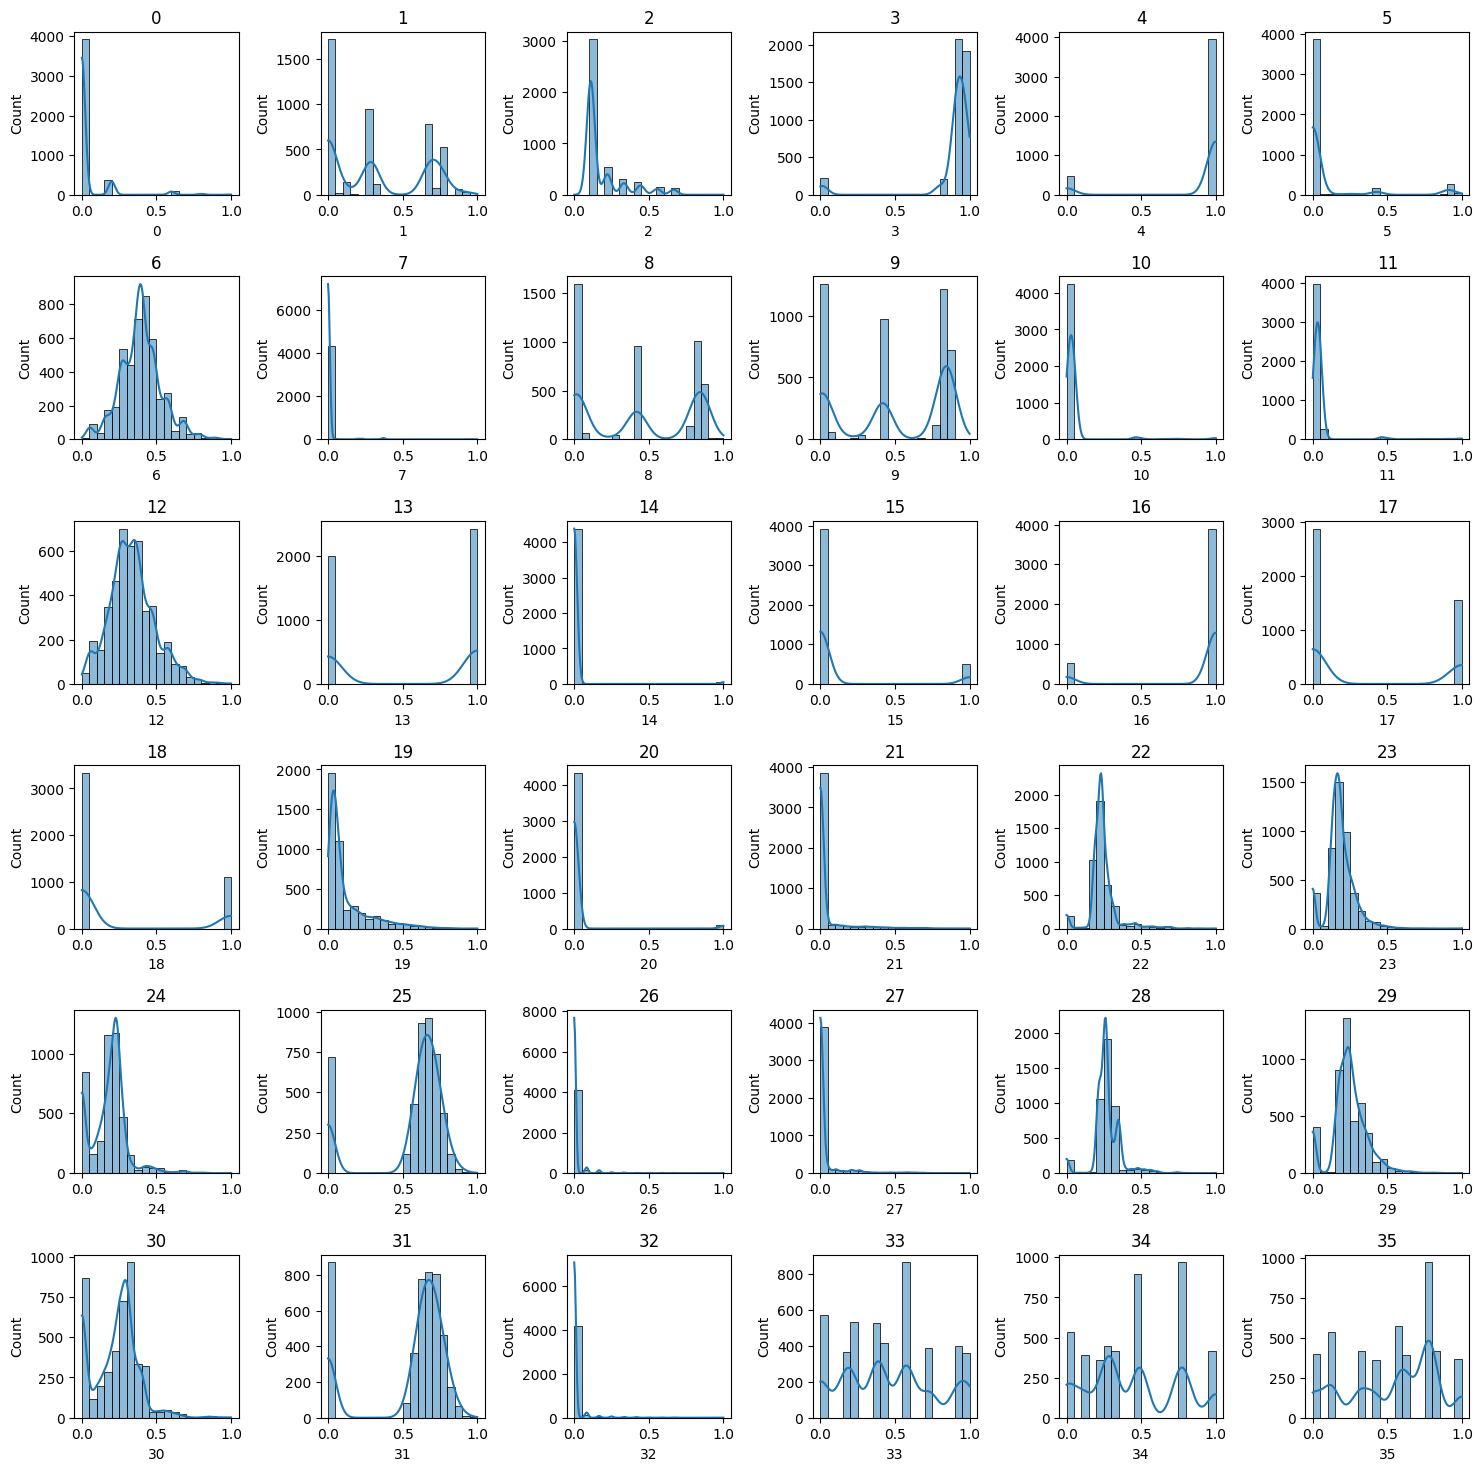

In [5]:
# Criando um DataFrame pandas para facilitar a análise estatística
df = pd.DataFrame(X_normalized, columns = dataset.data.feature_names)

# Calculando média e variância de cada atributo
mean_values = df.mean()
variance_values = df.var()

# Imprimindo média e variância
print("\n\nMédia dos atributos:\n")
print(mean_values)
print("\n\nVariância dos atributos:\n")
print(variance_values)

# Plotando histograma para cada atributo
fig, axes = plt.subplots(nrows = 6, ncols = 6, figsize = (18, 18))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i, column in enumerate(df.columns):
    ax = axes.flatten()[i]
    sns.histplot(df[column], ax = ax, bins = 20, kde = True)
    ax.set_title(column)

print("\n\nHistograma de cada atributo:\n")
plt.show()

---
# 🔀 Divisão do Conjunto de Dados:

In [6]:
# Dividindo o conjunto de dados em treinamento (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

# Imprimindo o tamanho de cada conjunto
print(f"\n\nTamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

print("\n\nPrimeiras linhas dos dados normalizados de treinamento:\n")
print(X_train_normalized[:5])

print("\n\nPrimeiras linhas dos dados normalizados de validação:\n")
print(X_val_normalized[:5])



Tamanho do conjunto de treinamento: 2654
Tamanho do conjunto de validação: 885
Tamanho do conjunto de teste: 885


Primeiras linhas dos dados normalizados de treinamento:

[[0.         0.         0.11111111 0.90901788 1.         0.
  0.26315789 0.         0.42857143 0.         0.04123711 0.03608247
  0.21157895 1.         0.         0.         1.         0.
  0.         0.03773585 0.         0.         0.23076923 0.17777778
  0.23076923 0.73415326 0.         0.         0.26086957 0.27272727
  0.25       0.75645161 0.         0.73255814 0.11111111 0.64068692]
 [0.         0.67857143 0.22222222 0.92438241 1.         0.
  0.15789474 0.         0.42857143 0.         0.0257732  0.0257732
  0.43684211 0.         0.         0.         1.         1.
  0.         0.20754717 0.         0.         0.19230769 0.13333333
  0.         0.         0.         0.         0.2173913  0.15151515
  0.         0.         0.         0.73255814 0.11111111 0.64068692]
 [0.         0.67857143 0.11111111 0.9677

---
# Objeto Perceptron Multicamadas (MLP)
- O objeto MLP é um classificador que implementa uma rede neural de várias camadas, que é treinada usando o algoritmo de retropropagação. O número de camadas e neurônios por camada é um hiperparâmetro que deve ser ajustado para cada conjunto de dados específico. A otimização desses hiperparâmetros é crucial para garantir a eficácia do modelo.

- Para darmos seguimento com as etapas do trabalho vamos precisar deste objeto, que será utilizado para treinar e avaliar o modelo de Machine Learning.

In [7]:
class Perceptron:
    def __init__(self, n_entradas, taxa_aprendizado = 0.01, n_epocas = 100):
        self.n_entradas = n_entradas
        self.taxa_aprendizado = taxa_aprendizado
        self.n_epocas = n_epocas
        self.pesos = np.random.rand(n_entradas + 1)
        self.erros = []

    # Função Degrau
    def funcao_ativacao(self, x):
        return 1 if x >= 0 else 0
    
    # Função de Predição
    def predicao(self, X):
        # Adicionando um vetor de 1's para representar o bias
        X_with_bias = np.c_[X, np.ones(X.shape[0])]

        return np.array([self.funcao_ativacao(np.dot(self.pesos, x)) for x in X_with_bias])
    
    # Função de Treinamento
    def treina(self, X, y):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]

        for _ in range(self.n_epocas):
            erro_epoca = 0
            
            for i in range(X_with_bias.shape[0]):
                erro = y[i] - self.funcao_ativacao(np.dot(self.pesos, X_with_bias[i]))
                self.pesos += self.taxa_aprendizado * erro * X_with_bias[i]
                erro_epoca += int(erro[0] != 0.0)

            self.erros.append(erro_epoca)

---
# 🏋️‍♂️🧾 Treinamento e Validação dos Modelos:

In [29]:
# Função de Treinamento e Validação usando o Perceptron
def treina_e_valida_perceptron(perceptron, X_train, y_train, X_val, y_val):
    perceptron.treina(X_train, y_train)

    # Fazendo previsões no conjunto de validação
    y_pred = perceptron.predicao(X_val)

    # Convertendo as previsões de volta para os rótulos originais (Dropout e Graduate)
    y_pred_val_labels = np.where(y_pred == 0, 'Dropout', 'Graduate')
    return y_pred, y_pred_val_labels

# Mapeando classes para 0 e 1
y_train_mapped = np.where(y_train == 'Dropout', 0, 1)
y_val_mapped = np.where(y_val == 'Dropout', 0, 1)

# Criando e treinando o Perceptron
perceptron = Perceptron(n_entradas = X_train_normalized.shape[1], taxa_aprendizado = 0.03, n_epocas = 10000)
[y_pred, y_pred_labeled] = treina_e_valida_perceptron(perceptron, X_train_normalized, y_train_mapped, X_val_normalized, y_val_mapped)


In [30]:
# Avaliando a acurácia no conjunto de validação
acuracia_val = accuracy_score(y_val_mapped, y_pred)
print(f"Acurácia no conjunto de validação: {acuracia_val:.2f}")

Acurácia no conjunto de validação: 0.83


---
# 💡 Conceitos

- Em aprendizado de máquina, espcialmente em tarefas de modelagem preditiva, `X` é frequentemente usado para representar as features ou variáveis independentes do conjunto de dados.
Em outras palavras, `X` é uma matriz ou DataFrame que contém as informações sobre as características ou atributos dos dados que são utilizados para fazer previsões.

- Por outro lado, `y` é frequentemente usado para representar o target dependente ou resposta do conjunto de dados. Em outras palavras, `y` é um vetor que contém as informações sobre a variável que queremos prever.

Na prática:
- `X`: Conjunto de dados das features ou variáveis independentes.
- `y`: Conjunto de dados do target dependente ou resposta.

---
# Bloco de Teste

- Utilize o bloco abaixo para efetuar os testes necessários para o desenvolvimento do trabalho.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dataset = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 

print(dataset.data.targets)



        Target
0      Dropout
1     Graduate
2      Dropout
3     Graduate
4     Graduate
...        ...
4419  Graduate
4420   Dropout
4421   Dropout
4422  Graduate
4423  Graduate

[4424 rows x 1 columns]


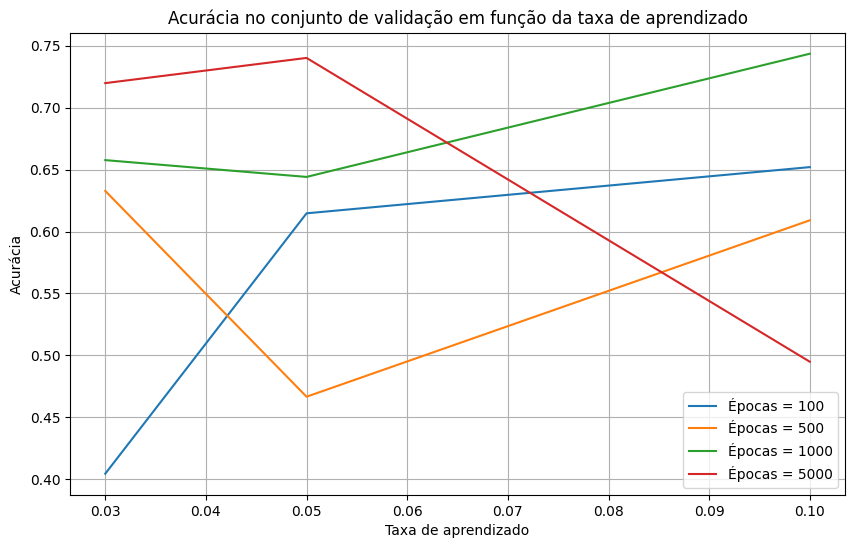

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Listas para armazenar as acurácias
acuracias = []

# Definindo as listas de valores para número de épocas e taxa de aprendizado
num_epocas_list = [100, 500, 1000, 5000]
taxa_aprendizado_list = [0.03, 0.05, 0.1]

# Loop para iterar sobre todas as combinações de número de épocas e taxa de aprendizado
for taxa_aprendizado in taxa_aprendizado_list:
    for num_epocas in num_epocas_list:
        # Criando um novo objeto Perceptron com os parâmetros variáveis
        perceptron = Perceptron(n_entradas=X_train_normalized.shape[1], taxa_aprendizado=taxa_aprendizado, n_epocas=num_epocas)
        
        # Treinando e validando o perceptron com os parâmetros variáveis
        [y_pred, y_pred_labeled] = treina_e_valida_perceptron(perceptron, X_train_normalized, y_train_mapped, X_val_normalized, y_val_mapped)
        
        # Calculando a acurácia e armazenando na lista
        acuracia_val = accuracy_score(y_val_mapped, y_pred)
        acuracias.append(acuracia_val)

# Reshape das acurácias para criar um array 2D
acuracias = np.array(acuracias).reshape(len(num_epocas_list), len(taxa_aprendizado_list))

# Criando o gráfico
plt.figure(figsize=(10, 6))
for i, num_epocas in enumerate(num_epocas_list):
    plt.plot(taxa_aprendizado_list, acuracias[i], label=f'Épocas = {num_epocas}')
plt.title('Acurácia no conjunto de validação em função da taxa de aprendizado')
plt.xlabel('Taxa de aprendizado')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()
